In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.stats import maxwell

import os, sys, inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, parent_dir) 

import algorithms as a
import force_functions as f

In [2]:
t_max = 100
dt = .002
N = 64
lam = 0.1931833275037836

In [3]:
def init(N, L, lattice_constant):
    
    positions = list(np.arange(-L/2., L/2., lattice_constant))
    r0 = np.array(np.meshgrid(positions, positions, positions)).T.reshape(-1,3)
    p0 = maxwell.rvs(loc=0, scale=1.5, size=(N,3)) / np.sqrt(1.5)
    
    return r0, p0

In [4]:
r0, p0 = init(N=64, L=6., lattice_constant=1.5)

In [5]:
print('initial energy: {}'.format(f.calc_LJ_energy(r0, p0, sigma=1, periodic={'PBC': True, 'box_size': 6.})))

initial energy: 328.7777331268711


/Users/erichter/Documents/Uni/SS21/MolecularSimulations/Assignments/molecular_simulations/force_functions.py:216: RuntimeWarning: divide by zero encountered in true_divide
  V = (4 * np.power(sigma / distances, 12) - 4 * np.power(sigma / distances, 6))
/Users/erichter/Documents/Uni/SS21/MolecularSimulations/Assignments/molecular_simulations/force_functions.py:216: RuntimeWarning: invalid value encountered in subtract
  V = (4 * np.power(sigma / distances, 12) - 4 * np.power(sigma / distances, 6))


In [6]:
R, P, t = a.BABAB_Ndim(r0, p0, t_max, dt, f.LJ_force, lam, thermal_noise=False,
                       periodic={'PBC': True, 'box_size': 6., 'closed': False})

  0%|          | 0/49999 [00:00<?, ?it/s]/Users/erichter/Documents/Uni/SS21/MolecularSimulations/Assignments/molecular_simulations/force_functions.py:140: RuntimeWarning: divide by zero encountered in true_divide
  f = (48 * np.power(sigma, 12) / np.power(distances, 13) - 24 * np.power(sigma, 6) / np.power(distances, 7)) / distances
/Users/erichter/Documents/Uni/SS21/MolecularSimulations/Assignments/molecular_simulations/force_functions.py:140: RuntimeWarning: invalid value encountered in subtract
  f = (48 * np.power(sigma, 12) / np.power(distances, 13) - 24 * np.power(sigma, 6) / np.power(distances, 7)) / distances
100%|██████████| 49999/49999 [01:35<00:00, 525.22it/s]


In [7]:
E = np.zeros(len(t))
for i in tqdm(range(len(t))):
    E[i] = f.calc_LJ_energy(R[i], P[i], sigma=1, periodic={'PBC': True, 'box_size': 6.})

100%|██████████| 50000/50000 [00:28<00:00, 1773.39it/s]


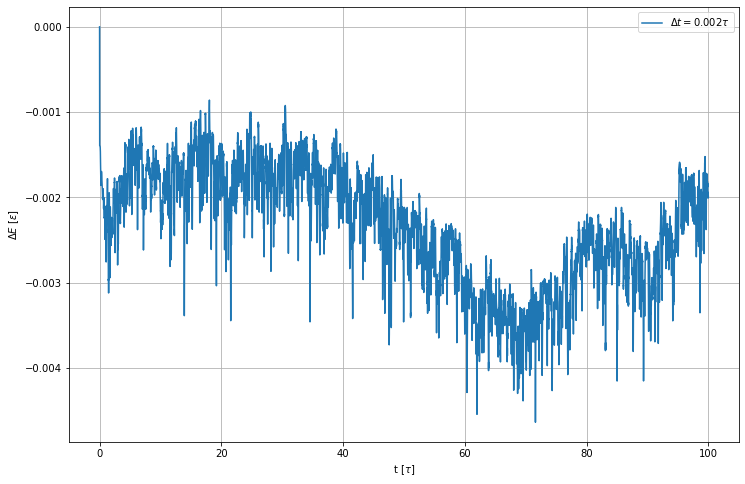

In [8]:
fig1, ax1 = plt.subplots(figsize=(12,8))
ax1.plot(t, E-E[0], label=r'$\Delta t=0.002\tau$')
ax1.set_xlabel(r't $[\tau]$')
ax1.set_ylabel(r'$\Delta E$ $[\epsilon]$')
ax1.legend()
ax1.grid(True)
plt.show()

In [9]:
num_configs = 10
k = 1

In [11]:
mu_exc = np.zeros(num_configs)
for i in range(num_configs):
    
    potential_diff = np.zeros(20)
    r0, p0 = init(N=64, L=6., lattice_constant=1.5)
    r, p, t = a.velocity_verlet_Ndim(r0, p0, t_max, dt, f.LJ_force,
                                          periodic={'PBC': True, 'box_size': 6., 'closed': False})
    
    r_insert = np.random.uniform(low=-6., high=6., size=(10**k, 3))
    r_new = np.concatenate([r[-1], r_insert])
    
    DeltaE = calc_LJ_pot(r_new, sigma=1, periodic={'PBC': True, 'box_size': 6.}) - \
             calc_LJ_pot(r[-1], sigma=1, periodic={'PBC': True, 'box_size': 6.})
    
    mu_exc_i = -1.5 * np.log(np.exp(-DeltaE/1.5))
    
    mu_exc[i] = mu_exc_i

  0%|          | 0/49999 [00:00<?, ?it/s]/Users/erichter/Documents/Uni/SS21/MolecularSimulations/Assignments/molecular_simulations/force_functions.py:140: RuntimeWarning: divide by zero encountered in true_divide
  f = (48 * np.power(sigma, 12) / np.power(distances, 13) - 24 * np.power(sigma, 6) / np.power(distances, 7)) / distances
/Users/erichter/Documents/Uni/SS21/MolecularSimulations/Assignments/molecular_simulations/force_functions.py:140: RuntimeWarning: invalid value encountered in subtract
  f = (48 * np.power(sigma, 12) / np.power(distances, 13) - 24 * np.power(sigma, 6) / np.power(distances, 7)) / distances
100%|██████████| 49999/49999 [01:03<00:00, 791.97it/s]
<ipython-input-10-902f20aa5a12>:16: RuntimeWarning: divide by zero encountered in true_divide
  V = (4 * np.power(sigma / distances, 12) - 4 * np.power(sigma / distances, 6))
<ipython-input-10-902f20aa5a12>:16: RuntimeWarning: invalid value encountered in subtract
  V = (4 * np.power(sigma / distances, 12) - 4 * np.pow

In [12]:
mu_exc

array([inf, inf, inf, inf, inf, inf, inf, inf, inf, inf])

In [13]:
r_insert = np.random.uniform(low=-3., high=3., size=(10**k, 3))
r_new = np.concatenate([r[-1], r_insert])
r_old = np.concatenate([r[-1], np.zeros([10**k, 3])])

In [15]:
DeltaE = calc_LJ_pot(r_new, sigma=1, periodic={'PBC': True, 'box_size': 6.}) - \
         calc_LJ_pot(r[-1], sigma=1, periodic={'PBC': True, 'box_size': 6.})

DeltaE

<ipython-input-10-902f20aa5a12>:16: RuntimeWarning: divide by zero encountered in true_divide
  V = (4 * np.power(sigma / distances, 12) - 4 * np.power(sigma / distances, 6))
<ipython-input-10-902f20aa5a12>:16: RuntimeWarning: invalid value encountered in subtract
  V = (4 * np.power(sigma / distances, 12) - 4 * np.power(sigma / distances, 6))


403649.4517961599

In [40]:
def calc_LJ_pot(r, sigma=1, periodic=None):
    if periodic is None:
        periodic = {'PBC': False,
                    'box_size': 0}

    idx = np.arange(len(r))
    pairs = np.meshgrid(idx, idx)
    separations = r[pairs[0]] - r[pairs[1]]

    if periodic['PBC']:
        separations[np.where(separations > periodic['box_size'] / 2.)] -= periodic['box_size']
        separations[np.where(separations < -periodic['box_size'] / 2.)] += periodic['box_size']

    distances = np.triu(np.linalg.norm(separations, axis=-1))
    print(distances[np.where(distances>0.)].min())

    V = (4 * np.power(sigma / distances, 12) - 4 * np.power(sigma / distances, 6))
    V[np.isnan(V)] = 0.
    V = V.sum()

    return V

In [41]:
V=calc_LJ_pot(r_new, sigma=1, periodic={'PBC': True, 'box_size': 6.})

0.3874529978241612


<ipython-input-40-acd90ae92d28>:17: RuntimeWarning: divide by zero encountered in true_divide
  V = (4 * np.power(sigma / distances, 12) - 4 * np.power(sigma / distances, 6))
<ipython-input-40-acd90ae92d28>:17: RuntimeWarning: invalid value encountered in subtract
  V = (4 * np.power(sigma / distances, 12) - 4 * np.power(sigma / distances, 6))


In [42]:
(4 * np.power(1 / 0.3874529978241612, 12) - 4 * np.power(1 / 0.3874529978241612, 6))

348305.181445311